In [1]:
import tensorflow as tf
import numpy as np
from sklearn.utils import shuffle
%matplotlib inline
import matplotlib.pyplot as plt 

trainsamples = 200
testsamples = 60

In [2]:
hw1 = tf.random_normal([1, 10], stddev=0.01)# Create first hidden layer
ow = tf.random_normal([10, 1], stddev=0.01) # Create output connection
b = tf.random_normal([10], stddev=0.01) # Create bias
dsX = np.linspace(-1, 1, trainsamples + testsamples)
dsY = 0.4* pow(dsX,2) +2 * dsX + np.random.randn(*dsX.shape) * 0.22 + 0.8 
sess=tf.Session()
print("dsX")
print(dsX)
dsX2=tf.reshape(dsX,[trainsamples + testsamples,1])
sess=tf.Session()
print("dsX2")
print(sess.run(dsX2))
#print(sess.run(hw1))
#print(sess.run(ow))
#print(sess.run(b))

dsX
[-1.         -0.99227799 -0.98455598 -0.97683398 -0.96911197 -0.96138996
 -0.95366795 -0.94594595 -0.93822394 -0.93050193 -0.92277992 -0.91505792
 -0.90733591 -0.8996139  -0.89189189 -0.88416988 -0.87644788 -0.86872587
 -0.86100386 -0.85328185 -0.84555985 -0.83783784 -0.83011583 -0.82239382
 -0.81467181 -0.80694981 -0.7992278  -0.79150579 -0.78378378 -0.77606178
 -0.76833977 -0.76061776 -0.75289575 -0.74517375 -0.73745174 -0.72972973
 -0.72200772 -0.71428571 -0.70656371 -0.6988417  -0.69111969 -0.68339768
 -0.67567568 -0.66795367 -0.66023166 -0.65250965 -0.64478764 -0.63706564
 -0.62934363 -0.62162162 -0.61389961 -0.60617761 -0.5984556  -0.59073359
 -0.58301158 -0.57528958 -0.56756757 -0.55984556 -0.55212355 -0.54440154
 -0.53667954 -0.52895753 -0.52123552 -0.51351351 -0.50579151 -0.4980695
 -0.49034749 -0.48262548 -0.47490347 -0.46718147 -0.45945946 -0.45173745
 -0.44401544 -0.43629344 -0.42857143 -0.42084942 -0.41312741 -0.40540541
 -0.3976834  -0.38996139 -0.38223938 -0.37451737

In [26]:
testX, testY = dsX[trainsamples:trainsamples + testsamples], dsY[trainsamples:trainsamples+testsamples]
print(testX)
print(testY)

[0.54440154 0.55212355 0.55984556 0.56756757 0.57528958 0.58301158
 0.59073359 0.5984556  0.60617761 0.61389961 0.62162162 0.62934363
 0.63706564 0.64478764 0.65250965 0.66023166 0.66795367 0.67567568
 0.68339768 0.69111969 0.6988417  0.70656371 0.71428571 0.72200772
 0.72972973 0.73745174 0.74517375 0.75289575 0.76061776 0.76833977
 0.77606178 0.78378378 0.79150579 0.7992278  0.80694981 0.81467181
 0.82239382 0.83011583 0.83783784 0.84555985 0.85328185 0.86100386
 0.86872587 0.87644788 0.88416988 0.89189189 0.8996139  0.90733591
 0.91505792 0.92277992 0.93050193 0.93822394 0.94594595 0.95366795
 0.96138996 0.96911197 0.97683398 0.98455598 0.99227799 1.        ]
[1.59761998 1.89201633 2.08501788 2.33294894 1.92089393 2.31242408
 2.03910738 2.36134864 2.32687219 1.94452431 2.10145032 2.21684871
 2.34035002 2.1911946  2.03034511 2.69319745 2.42648569 2.42023694
 2.55180613 2.43551663 2.22699795 2.62109554 2.25543639 2.50395671
 2.39356056 2.82573204 2.8530754  2.2970839  2.60352052 2.301

In [17]:
a=tf.constant(123)
print(a.graph)
print(tf.get_default_graph())

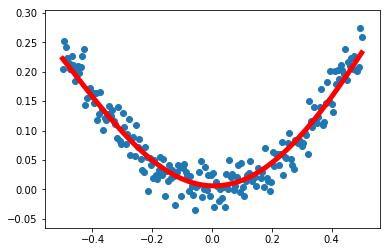

In [5]:

# coding: utf-8

import tensorflow as tf

import numpy as np

import matplotlib.pyplot as plt

#使用numpy生成200个随机点

x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]#因为网络输入是一个1个节点，测试数据有200个，所以是200行，1列的数据

noise = np.random.normal(0,0.02,x_data.shape)

y_data = np.square(x_data) + noise

#定义两个placeholder

x = tf.placeholder(tf.float32,[None,1])

y = tf.placeholder(tf.float32,[None,1])

#定义神经网络中间层

Weights_L1 = tf.Variable(tf.random_normal([1,10]))

biases_L1 = tf.Variable(tf.zeros([1,10]))

Wx_plus_b_L1 = tf.matmul(x,Weights_L1) + biases_L1

L1 = tf.nn.tanh(Wx_plus_b_L1)

#定义神经网络输出层

Weights_L2 = tf.Variable(tf.random_normal([10,1]))

biases_L2 = tf.Variable(tf.zeros([1,1]))

Wx_plus_b_L2 = tf.matmul(L1,Weights_L2) + biases_L2

prediction = tf.nn.tanh(Wx_plus_b_L2)

#二次代价函数

loss = tf.reduce_mean(tf.square(y-prediction))

#使用梯度下降法训练

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())
    tf.train.write_graph(sess.graph, './graphs2','graph.pbtxt')
    writer = tf.summary.FileWriter('./graphs2', sess.graph)

    for _ in range(2000):

        sess.run(train_step,feed_dict={x:x_data,y:y_data})

    #获得预测值

    prediction_value = sess.run(prediction,feed_dict={x:x_data})

    #画图

    plt.figure()

    plt.scatter(x_data,y_data)

    plt.plot(x_data,prediction_value,'r-',lw=5)

    plt.show()
